In [3]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model
from sklearn import metrics

In [4]:
df = pd.read_csv("bitcoindata_scaled_02.10.21.csv", sep=';')
#print(df)
#df['Result']

In [5]:
df_tech = pd.read_csv("Technology.csv", sep=',')
#print(df_tech)
#df['Result']


In [6]:
df_birles = pd.merge(df, df_tech, on='Date')

df = df_birles.rename(columns={'hash-rate':'HASHRATE', 'difficulty':'MINDIFF'})
#print(df_birles)

In [7]:
print(df['MINDIFF'])

0       1.007629e+07
1       1.007629e+07
2       1.007629e+07
3       1.007629e+07
4       1.007629e+07
            ...     
2820    2.060742e+13
2821    2.060742e+13
2822    2.060742e+13
2823    2.060742e+13
2824    2.060742e+13
Name: MINDIFF, Length: 2825, dtype: float64


In [8]:
y=df['Bitcoin']
X = df[['EURUSD','SP500','DawJones','VIX','Gold','Libor3m','US10YR','WTICRUDE', 'HASHRATE', 'MINDIFF']]
#features = df.columns[2:]
print(X)
#print(features)

        EURUSD     SP500  DawJones       VIX      Gold   Libor3m    US10YR  \
0     1.384636 -1.597847 -1.564768 -0.419169  0.658277 -0.887240 -0.695392   
1     1.441948 -1.590240 -1.555560 -0.444735  0.659523 -0.888400 -0.695392   
2     1.519845 -1.618806 -1.606306 -0.314213  0.643321 -0.888400 -0.757902   
3     1.534783 -1.590201 -1.580267 -0.435316  0.576020 -0.888400 -0.757902   
4     1.408823 -1.557869 -1.541336 -0.534889  0.678218 -0.886080 -0.570371   
...        ...       ...       ...       ...       ...       ...       ...   
2820  0.366433  2.609253  2.197885  0.937182  2.493267 -0.945595 -1.625234   
2821  0.336624  2.623978  2.199161  0.900178  2.460198 -0.945355 -1.629141   
2822  0.346497  2.638703  2.200437  0.863174  2.505813 -0.945784 -1.633047   
2823  0.412725  2.740405  2.281478  0.639807  2.563143 -0.947234 -1.633047   
2824  0.387731  2.742748  2.236146  0.604822  2.628201 -0.952605 -1.601792   

      WTICRUDE      HASHRATE       MINDIFF  
0     1.546898  7.

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

In [10]:
#Apply Random Forest
# Create a random forest classifier
from sklearn.ensemble import RandomForestRegressor
clf = RandomForestRegressor(n_estimators=10000, random_state=0, n_jobs=-1, max_depth=12)

# Train the classifier
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

feat_labels = ['EURUSD','SP500','DowJones','VIX','Gold','Libor3m','US10YR','WTICRUDE', 'HASHRATE', 'MINDIFF']
# Print the name and gini importance of each feature
importances = list(clf.feature_importances_)
feature_importances = [(feature, round(importance, 5)) for feature, importance in zip(feat_labels, importances)]
print(feature_importances)

[('EURUSD', 0.01096), ('SP500', 0.29267), ('DowJones', 0.18192), ('VIX', 0.00952), ('Gold', 0.00956), ('Libor3m', 0.05517), ('US10YR', 0.00584), ('WTICRUDE', 0.00526), ('HASHRATE', 0.04323), ('MINDIFF', 0.38588)]


Variable: MINDIFF              Importance: 0.38588
Variable: SP500                Importance: 0.29267
Variable: DowJones             Importance: 0.18192
Variable: Libor3m              Importance: 0.05517
Variable: HASHRATE             Importance: 0.04323
Variable: EURUSD               Importance: 0.01096
Variable: Gold                 Importance: 0.00956
Variable: VIX                  Importance: 0.00952
Variable: US10YR               Importance: 0.00584
Variable: WTICRUDE             Importance: 0.00526


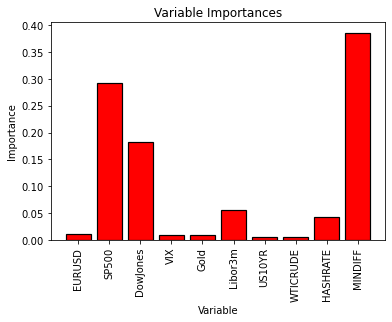

In [11]:
import matplotlib.pyplot as plt
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances]

# list of x locations for plotting
x_values = list(range(len(importances)))# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical', color = 'r', edgecolor = 'k', linewidth = 1.2)# Tick labels for x axis
plt.xticks(x_values, feat_labels, rotation='vertical')# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

In [12]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.03747057171477746
Mean Squared Error: 0.012263183942398908
Root Mean Squared Error: 0.11073926107031286


In [27]:
import statsmodels.api as sm
model = sm.OLS(y,X)
results = model.fit()
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:                Bitcoin   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.804
Method:                 Least Squares   F-statistic:                     1292.
Date:                Fri, 19 Mar 2021   Prob (F-statistic):               0.00
Time:                        12:24:50   Log-Likelihood:                -1698.4
No. Observations:                2825   AIC:                             3417.
Df Residuals:                    2815   BIC:                             3476.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
EURUSD         0.3220      0.022     14.402      0.0

[ 3.04324575e-01 -1.43864246e-01  1.22377511e+00  1.48424584e-01
  4.63044920e-02 -2.43653196e-01 -2.21674391e-03 -9.09628670e-02
  1.55044415e-08 -1.28203004e-13]
Feature: 0, Score: 0.30432
Feature: 1, Score: -0.14386
Feature: 2, Score: 1.22378
Feature: 3, Score: 0.14842
Feature: 4, Score: 0.04630
Feature: 5, Score: -0.24365
Feature: 6, Score: -0.00222
Feature: 7, Score: -0.09096
Feature: 8, Score: 0.00000
Feature: 9, Score: -0.00000


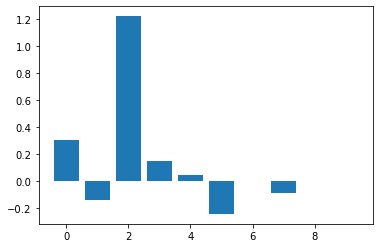

In [41]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X, y)
# get importance
importance = model.coef_

print(importance)
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

Feature: 0, Score: 0.01392
Feature: 1, Score: 0.01068
Feature: 2, Score: 0.22117
Feature: 3, Score: 0.01028
Feature: 4, Score: 0.00206
Feature: 5, Score: 0.06506
Feature: 6, Score: 0.01978
Feature: 7, Score: 0.00185
Feature: 8, Score: 0.04498
Feature: 9, Score: 0.61021


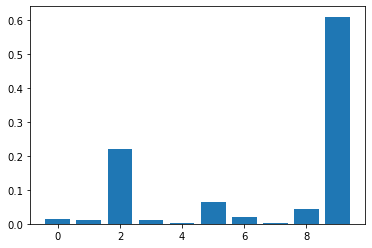

In [45]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
# fit the model
model.fit(X, y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

Feature: 0, Score: 0.00243
Feature: 1, Score: 0.01906
Feature: 2, Score: 0.12349
Feature: 3, Score: 0.00307
Feature: 4, Score: 0.00622
Feature: 5, Score: 0.02257
Feature: 6, Score: 0.00754
Feature: 7, Score: 0.00152
Feature: 8, Score: 0.03526
Feature: 9, Score: 0.77885


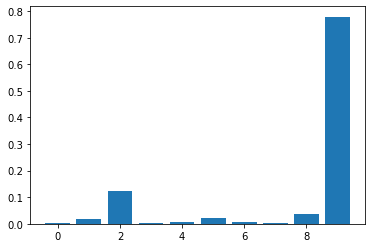

In [48]:
from xgboost import XGBRegressor
model = XGBRegressor()
# fit the model
model.fit(X, y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show() 

Index(['EURUSD', 'SP500', 'DawJones', 'VIX', 'Gold', 'Libor3m', 'US10YR',
       'WTICRUDE', 'HASHRATE', 'MINDIFF'],
      dtype='object')
[0.02710604 0.16247082 0.27699292 0.00251024 0.03928209 0.08537443
 0.03408289 0.0300026  0.19537505 0.14680292]
Feature: 0, Score: 0.02711
Feature: 1, Score: 0.16247
Feature: 2, Score: 0.27699
Feature: 3, Score: 0.00251
Feature: 4, Score: 0.03928
Feature: 5, Score: 0.08537
Feature: 6, Score: 0.03408
Feature: 7, Score: 0.03000
Feature: 8, Score: 0.19538
Feature: 9, Score: 0.14680


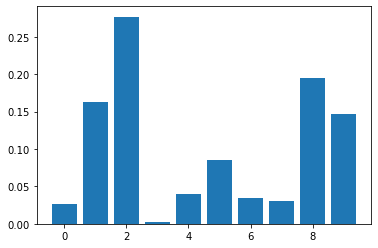

In [49]:
from sklearn.ensemble import ExtraTreesRegressor

# feature extraction
model = ExtraTreesRegressor(n_estimators=10)
model.fit(X, y)
print(X.columns)
print(model.feature_importances_)
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

Feature: 0, Score: 0.00005
Feature: 1, Score: -0.00002
Feature: 2, Score: 0.00005
Feature: 3, Score: 0.00003
Feature: 4, Score: -0.00001
Feature: 5, Score: 0.00001
Feature: 6, Score: 0.00009
Feature: 7, Score: 0.00001
Feature: 8, Score: 0.00375
Feature: 9, Score: 1.94814


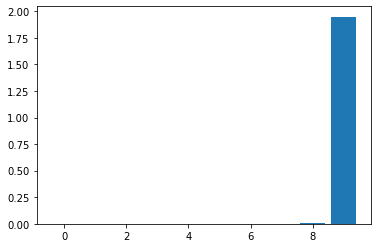

In [55]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.inspection import permutation_importance
model = KNeighborsRegressor()
# fit the model
model.fit(X, y)
# perform permutation importance
results = permutation_importance(model, X, y)
# get importance
importance = results.importances_mean
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [15]:
def f_importances(coef, names):
    imp = coef
    imp,names = zip(*sorted(zip(imp,names)))
    plt.barh(range(len(names)), imp, align='center')
    plt.yticks(range(len(names)), names)
    plt.show()

In [ ]:
from sklearn import svm

#Create a svm Regressor
clf = svm.SVR(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

feat_labels = ['EURUSD','SP500','DowJones','VIX','Gold','Libor3m','US10YR','WTICRUDE', 'HASHRATE', 'MINDIFF']
# Print the name and gini importance of each feature
importances = list(clf.coef_)
print(importances)
pd.Series(abs(clf.coef_[0]), index=X_train.columns).nlargest(10).plot(kind='barh')

In [ ]:
print(len(y_test))

y_test_sorted = y_test.values
print(y_test_sorted)
print(y_pred)

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.plot(y_test_sorted)
plt.plot(y_pred)
print(y_test.describe())
#print(y_pred.describe())
#plot_series(y_test)

In [ ]:
def plot_series(time, series, format="-", start=0, end=None):
    plt.plot(time[start:end], series[start:end], format)
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.grid(True)

In [ ]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))